In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\potas\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [34]:
import pandas as pd
# from sklearn.ensemble import RandomForestClassifier

# Necessary for k nearest neighbors train test split (see Ins_K_Nearest_Neighbors)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Necessary for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(100)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CONFIRMED,0,0,0,0,8.103633,2.030000e-05,-2.030000e-05,176.948600,0.002050,...,-146,4.574,0.054,-0.041,0.732,0.062,-0.068,283.22141,40.421829,15.289
96,CONFIRMED,0,0,0,0,4.715108,1.940000e-05,-1.940000e-05,134.961780,0.003240,...,-146,4.574,0.054,-0.041,0.732,0.062,-0.068,283.22141,40.421829,15.289
97,CONFIRMED,0,0,0,0,6.365840,8.060000e-06,-8.060000e-06,171.135750,0.001000,...,-155,4.554,0.042,-0.168,0.849,0.212,-0.071,291.14951,40.420521,15.090
98,CONFIRMED,0,0,0,0,3.040330,3.370000e-07,-3.370000e-07,169.949011,0.000089,...,-151,4.519,0.084,-0.063,0.791,0.071,-0.087,299.31610,40.822380,15.028


# Select your features (columns)

In [153]:
# Create a random forest classifier
data_df = df.drop('koi_disposition', axis=1)
target_df = df['koi_disposition']

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(data_df, target_df)
rf.score(data_df, target_df)

1.0

In [154]:
importances = rf.feature_importances_
importances

array([0.10172115, 0.07224999, 0.10798574, 0.03593631, 0.02193853,
       0.01834566, 0.01642397, 0.01299576, 0.02252857, 0.02100942,
       0.01812376, 0.01031934, 0.00997971, 0.02425998, 0.03485763,
       0.03301881, 0.01988269, 0.01215848, 0.01235937, 0.04941135,
       0.03374177, 0.03033483, 0.01580803, 0.01698889, 0.01863042,
       0.01526981, 0.05536131, 0.00341098, 0.00902954, 0.02969151,
       0.02723038, 0.00894635, 0.00877839, 0.01007473, 0.00932781,
       0.01058327, 0.00829742, 0.01212729, 0.01075498, 0.01010607])

In [155]:
sorted(zip(rf.feature_importances_, list(data_df.columns)), reverse=True)

[(0.1079857433498057, 'koi_fpflag_co'),
 (0.10172114901517368, 'koi_fpflag_nt'),
 (0.0722499935786915, 'koi_fpflag_ss'),
 (0.055361309366477846, 'koi_model_snr'),
 (0.04941134852025798, 'koi_prad'),
 (0.03593631044205264, 'koi_fpflag_ec'),
 (0.034857627435962206, 'koi_duration_err1'),
 (0.03374176789871509, 'koi_prad_err1'),
 (0.03301880938729495, 'koi_duration_err2'),
 (0.030334827193731956, 'koi_prad_err2'),
 (0.029691510225994765, 'koi_steff_err1'),
 (0.027230377838306116, 'koi_steff_err2'),
 (0.024259979709873973, 'koi_duration'),
 (0.022528574046964595, 'koi_time0bk_err1'),
 (0.02193852661796839, 'koi_period'),
 (0.021009423854377433, 'koi_time0bk_err2'),
 (0.019882694695159752, 'koi_depth'),
 (0.018630419559981494, 'koi_insol_err1'),
 (0.018345662938631168, 'koi_period_err1'),
 (0.01812375613816764, 'koi_impact'),
 (0.016988886543027895, 'koi_insol'),
 (0.01642397202886834, 'koi_period_err2'),
 (0.01580802982682897, 'koi_teq'),
 (0.01526981061231975, 'koi_insol_err2'),
 (0.012995

From the documentation, we cannot use any of the false positive flags, as koi_disposition is dependent on them. I am making a K nearest neighbors model, and I will start with koi_model_snr, which as a former astronomer I recognize as a signal to noise ratio, which is always a good first choice to characterise the dependability of an observation.

Also, errors in measurements are frequently correlate with the measurements themselves, so I have only select a measurement or its error, depending on what is highest on the importance list.

I notice that including data any further down on the importance list than 'koi_impact' starts to produce worsening models.

In [273]:
# Set features. This will also be used as your x values.

# All false positive flags removed, because they are accounted for in koi_disposition.

selected_features = df[['koi_model_snr', 'koi_prad', 'koi_duration_err1', 'koi_steff_err1', \
                       'koi_time0bk_err1', 'koi_period', 'koi_depth', \
                       'koi_insol_err1', 'koi_impact']]
selected_features.head()

,koi_model_snr,koi_prad,koi_duration_err1,koi_steff_err1,koi_time0bk_err1,koi_period,koi_depth,koi_insol_err1,koi_impact
0,25.8,2.83,0.11600,81,0.003520,54.418383,874.8,2.87,0.586
1,76.3,14.60,0.03410,158,0.000581,19.899140,10829.0,31.04,0.969
2,505.6,33.46,0.00537,157,0.000115,1.736952,8079.2,668.95,1.276
3,40.9,2.75,0.04200,169,0.001130,2.525592,603.3,874.33,0.701
4,40.2,2.77,0.06730,189,0.001900,4.134435,686.0,420.33,0.762


# Create a Train Test Split

Use `koi_disposition` for the y values

In [274]:
y = df['koi_disposition']
y.head()

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object

In [275]:
# Create a random forest classifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(selected_features, y)
# rf.score(selected_features, y)

In [276]:
# importances = rf.feature_importances_
# importances

In [277]:
# sorted(zip(rf.feature_importances_, list(selected_features.columns)), reverse=True)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)
X_train.head()

,koi_model_snr,koi_prad,koi_duration_err1,koi_steff_err1,koi_time0bk_err1,koi_period,koi_depth,koi_insol_err1,koi_impact
6122,10.8,1.24,0.3060,154,0.008440,6.768901,123.1,204.89,0.150
6370,13.8,0.86,0.2820,158,0.007950,0.733726,114.6,2253.61,0.291
2879,254.3,3.21,0.0000,151,0.006190,7.652707,641.1,195.16,0.970
107,38.4,2.25,0.0595,76,0.001820,7.953547,875.4,7.15,0.300
29,696.5,12.21,0.0075,77,0.000083,4.959319,9802.0,146.52,0.831


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [279]:
# Scale your data

# Inspired by MinMax under /supplemental in Ins_Data_Preprocessing
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

#Inspired by Label_Encoding in /supplemental in Ins_Data_Preprocessing
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
label_encoder.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [280]:
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.621
k: 3, Train/Test Score: 0.805/0.654
k: 5, Train/Test Score: 0.758/0.668
k: 7, Train/Test Score: 0.751/0.669
k: 9, Train/Test Score: 0.743/0.665
k: 11, Train/Test Score: 0.737/0.672
k: 13, Train/Test Score: 0.732/0.677
k: 15, Train/Test Score: 0.726/0.678
k: 17, Train/Test Score: 0.722/0.678
k: 19, Train/Test Score: 0.717/0.683


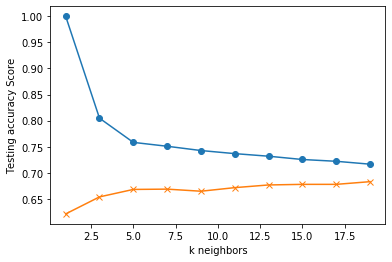

In [281]:
# This cell adapted from lesson Ins_K_Nearest_Neighbors
# I see the two curves get close around 250<k<300, so I am focusing on than part of the picture.

# Quote from the lesson on k nearest neighbors:
## Loop through different k values to see which has the highest accuracy
## Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
# for k in range(1, 20, 2):
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

In [282]:

# Below modified from Ins_K_Nearest_Neighbors Proceeding with modeling using 5 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_minmax, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))
print(f"Training Data Score: {knn.score(X_train_minmax, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_minmax, y_test)}")

k=17 Test Acc: 0.678
Training Data Score: 0.7221056646957849
Testing Data Score: 0.6779176201372997


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [283]:
# Create the GridSearchCV model

n_neighbors_list = []
for x in range(20):
    n_neighbors_list.append(2*x+3)
    

# Credit to Stu_GridSearch curriculum writer. This is my adaptation of that.

model = KNeighborsClassifier()
param_grid = {'n_neighbors': n_neighbors_list, 'weights':['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [284]:
# Train the model with GridSearch
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] algorithm=ball_tree, n_neighbors=3, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=uniform, score=0.653, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=uniform, score=0.663, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, weights=uniform .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, n_neighbors=3, weights=uniform, score=0.649, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=uniform, score=0.636, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=uniform, score=0.675, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, score=0.648, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, score=0.659, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=distance, score=0.642, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=3, weights=dista

[CV]  algorithm=ball_tree, n_neighbors=13, weights=distance, score=0.685, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=13, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=13, weights=distance, score=0.668, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=13, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=13, weights=distance, score=0.676, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=15, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=15, weights=uniform, score=0.684, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=15, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=15, weights=uniform, score=0.677, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=15, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=15, weights=uniform, score=0.685, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=15, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=15, weight

[CV]  algorithm=ball_tree, n_neighbors=23, weights=distance, score=0.681, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=25, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=25, weights=uniform, score=0.691, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=25, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=25, weights=uniform, score=0.695, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=25, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=25, weights=uniform, score=0.690, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=25, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=25, weights=uniform, score=0.656, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=25, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=25, weights=uniform, score=0.682, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=25, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=25, weights=

[CV]  algorithm=ball_tree, n_neighbors=35, weights=uniform, score=0.651, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=35, weights=uniform ............
[CV]  algorithm=ball_tree, n_neighbors=35, weights=uniform, score=0.678, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=35, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=35, weights=distance, score=0.690, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=35, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=35, weights=distance, score=0.697, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=35, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=35, weights=distance, score=0.705, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=35, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=35, weights=distance, score=0.663, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=35, weights=distance ...........
[CV]  algorithm=ball_tree, n_neighbors=35, weigh

[CV]  algorithm=kd_tree, n_neighbors=5, weights=distance, score=0.673, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.693, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.671, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.674, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.662, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=uniform, score=0.676, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=7, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=7, weights=distance, score=0.704

[CV]  algorithm=kd_tree, n_neighbors=17, weights=uniform, score=0.689, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=17, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=uniform, score=0.654, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=17, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=uniform, score=0.673, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=17, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=distance, score=0.697, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=17, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=distance, score=0.680, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=17, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=distance, score=0.685, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=17, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=17, weights=distance, sc

[CV]  algorithm=kd_tree, n_neighbors=27, weights=distance, score=0.687, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=27, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=distance, score=0.693, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=27, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=distance, score=0.704, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=27, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=distance, score=0.661, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=27, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=27, weights=distance, score=0.682, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=29, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=uniform, score=0.687, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=29, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=29, weights=uniform, s

[CV]  algorithm=kd_tree, n_neighbors=37, weights=distance, score=0.663, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=37, weights=distance .............
[CV]  algorithm=kd_tree, n_neighbors=37, weights=distance, score=0.675, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=39, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=uniform, score=0.686, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=39, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=uniform, score=0.699, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=39, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=uniform, score=0.689, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=39, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=uniform, score=0.649, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=39, weights=uniform ..............
[CV]  algorithm=kd_tree, n_neighbors=39, weights=uniform, scor

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   29.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [285]:
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 23, 'weights': 'distance'}
0.6877680670067459


In [272]:
# See how the model does predicting koi_disposition.

predictions = grid.predict(X_test_minmax)
print('Test Acc: %.3f' % grid.score(X_test_minmax, y_test))

Test Acc: 0.672


67.2% accuracy seems to be about as good as can be done with a k-nearest neighbor model. Anyone getting better accuracy than this with knn is probably mistakenly including fpflag values.

In [286]:
# Using the fine-tuned parameters for the model to be saved

knn_tuned = KNeighborsClassifier(n_neighbors=23, algorithm='ball_tree', weights='distance')

# Save the Model

In [287]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn.sav'
joblib.dump(knn_tuned, filename)

['knn.sav']